
# Linear Interpolation and Numerical Differentiation



## 1. Linear Interpolation

Linear interpolation estimates unknown values between two known data points using the formula:

$$
y = y_0 + \frac{(x - x_0)(y_1 - y_0)}{x_1 - x_0}
$$


### Exercise- 
Find the linear interpolation value at x = 2.5 between the two unkown data points (1, 3) & (4, 12). Print your results.

In [13]:
# Your code here to complete the Linear Interpolation Function
def linear_interpolation(x0, y0, x1, y1, x):
    return y0+((x- x0)*(y1 - y0))/(x1 - x0)
(x0,y0)=(1,3)
(x1,y1)=(4,12)
x=2.5
y=linear_interpolation(x0, y0, x1, y1, x)
print(linear_interpolation(x0, y0, x1, y1, x)) 


7.5



## 2. Numerical Differentiation

Numerical differentiation estimates the derivative of a function using discrete data points.

- Forward Difference:
$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

- Backward Difference:
$$f'(x) \approx \frac{f(x) - f(x-h)}{h}$$

- Central Difference:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$


### Exercise- 
Find the derivative of f = sin (x) at x = pi/4 using foward difference, backward difference, and central difference. You decide the step size.

In [38]:
# Your code here
import math
def f(x):
    return math.sin(x)
x=math.pi/4
h=0.00001
def forward_dx(x,h):
    return (f(x+h)-f(x))/h
print("Forward: ",forward_dx(x,h))

def backward_dx(x,h):
    return (f(x)-f(x-h))/h
print("Backward: ",backward_dx(x,h))

def central_dx(x,h):
    return (f(x+h)-f(x-h))/(2*h)
print("Central: ",central_dx(x,h))

print("Cos(pi/4): ",math.cos(math.pi/4))
print("1/sqrt(2): ",1/math.sqrt(2))

Forward:  0.7071032456340552
Backward:  0.7071103167111125
Central:  0.7071067811725839
Cos(pi/4):  0.7071067811865476
1/sqrt(2):  0.7071067811865475



## 3. Numerical Differentiation Using Taylor Series

Implement numerical differentiation formulas for higher-order derivatives using Taylor series expansions. 


### Exercise- 
Using Taylor series, compute the first to fourth derivatives of the function f(x) = sin(x) and plot them from x= 0 to x= 2(pi). 

In [57]:
# Your code here
def f(x):
    return math.sin(x)
def df(x):
    return (f(x+h)-f(x-h))/(2*h)

print("First Derivative: ",df(math.pi/4))
x=math.pi/4
h=0.001
def df2(x):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)
print("Second Derivative: ",f2(math.pi/4))
def df3(x):
    return (f(x+2*h)-2*f(x+h)+2*f(x-h)-f(x-2*h))/(2*h**3)
print("Third Derivative: ",f3(math.pi/4))

def df4(x):
    return (f(x+2*h)-4*f(x+h)+6*f(x)-4*f(x-h)+f(x-2*h))/(h**4)
print("Fourth Derivative: ",f4(math.pi/4))


First Derivative:  0.707106663335455
Second Derivative:  -0.707106722397377
Third Derivative:  -0.7071066510100366
Fourth Derivative:  0.7079892228034622


### Engineering Problem: Beam Deflection Analysis

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$


#### 🎯 Task:
Given deflection data y(x) along a beam, estimate the bending moment M(x) and shear force V(x) using numerical differentiation and plot them. 

Equations:
$$ M(x) = -EI \frac{d^2 y}{dx^2}$$
$$ V(x) = \frac{dM}{dx} $$

#### 📌 Constants:
- L = 10 
- w = 5 
- E = 200e9
- I = 1e-6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
w = 5      # kN/m
L = 10     # m
E = 200e9  # Young's modulus in Pa
I = 1e-6   # Moment of inertia in m^4

# Your code here


## 4. Ordinary Differential Equations - Initial Value Problems

This notebook introduces Ordinary Differential Equations (ODEs) with a focus on Initial Value Problems (IVPs). We will explore numerical methods such as Euler's Method and Runge-Kutta Methods with examples and visualizations.



### What is an ODE?

An Ordinary Differential Equation (ODE) is an equation involving a function and its derivatives.

### Initial Value Problem (IVP)
An IVP is an ODE along with a specified value at a starting point:

$$\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$



#### (a) Euler's Method

Algorithm:
1. Choose step size \( h \)
2. Iterate: \( y_{n+1} = y_n + h f(x_n, y_n) \)
3. Repeat for desired number of steps


#### Exercise
Use Euler's Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

i= 9


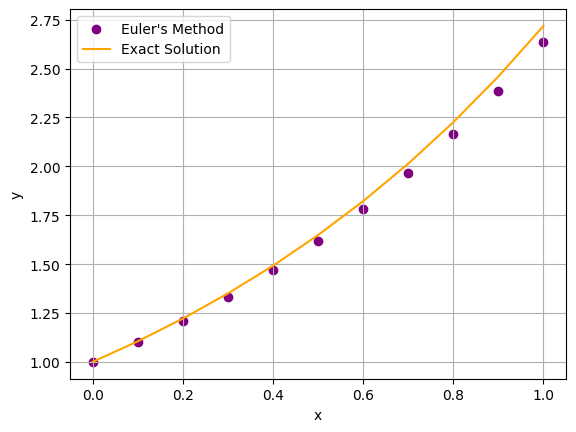

1.0


In [101]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

h=0.1
steps=10

def f(x,y):
    return np.exp(x)

x0=0
y0=1
xs=[x0]
ys=[y0]

for i in range(steps):
    y0+=h * f(x0,y0)
    x0+=h
    xs.append(x0)
    ys.append(y0)
print("i=",i)

plt.scatter(xs,ys,label="Euler's Method",color='purple')
plt.plot(xs,np.exp(xs),label='Exact Solution',color='orange')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

#(dy/dx)=np.exp(x)
print(f(0,0))



#### (b) Runge-Kutta Method (RK4)

Algorithm:
1. Compute intermediate slopes:
   - \( k_1 = h f(x_n, y_n) \)
   - \( k_2 = h f(x_n + h/2, y_n + k_1/2) \)
   - \( k_3 = h f(x_n + h/2, y_n + k_2/2) \)
   - \( k_4 = h f(x_n + h, y_n + k_3) \)
2. Update: \( y_{n+1} = y_n + (k_1 + 2k_2 + 2k_3 + k_4)/6 \)


#### Exercise
Use RK4 Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

In [ ]:
# Your code here

h=0.05
steps=20

def f(x,y):
   return np.exp(x)
#commit

x0=0
y0=1
xs=[x0]
ys=[y0]


for i in range(steps):
    k1=h*f(x0,y0)
    k2=h*f(x0+h*2,y0+k1/2)
    k3=h*f(x0+h/2,y0+k2/2)
    k4=h*f(x0+h,y0+k3)
    y0+= (k1+2*k2+2*k3+k4)/6
    x0+=h
    xs.append(x0)
    ys.append(y0)
    
    
    

print("i=",i)

plt.scatter(xs,ys,label="RK4",color='purple')
plt.plot(xs,np.exp(xs),label='Exact Solution',color='orange')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'